In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#Carregand o dataset a ser analisado
data = pd.read_csv('test_data_CANDIDATE.csv')

In [3]:
#Verificando as 30 primeiras linhas do dataset
data.head(30)

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,nar,hc,sk,trf
0,0,49,M,10000,130,269.0,0,1,163,0,0.0,2.0,0,2,2,0,1,6797.761892
1,1,61,F,10000,138,166.0,0,0,125,1,3.6,NaN,1,2,2,1,3,4307.686943
2,2,46,F,10000,140,311.0,0,1,120,1,1.8,NaN,2,3,2,0,1,4118.077502
3,3,69,F,10000,140,254.0,0,0,146,0,2.0,1.0,3,3,2,1,0,7170.849469
4,4,51,F,10000,100,222.0,0,1,143,1,1.2,1.0,0,2,2,1,0,5579.040145
5,5,51,F,10000,140,299.0,0,1,173,1,1.6,2.0,0,3,2,0,0,3267.628751
6,6,58,F,10000,120,284.0,0,0,160,0,1.8,1.0,0,2,2,0,0,6556.847684
7,7,58,F,10000,125,220.0,0,1,144,0,0.4,NaN,4,3,2,1,1,5120.660542
8,8,47,F,10000,112,204.0,0,1,143,0,0.1,NaN,0,2,2,0,1,6540.095874
9,9,66,M,10000,150,226.0,0,1,114,0,2.6,NaN,0,2,2,1,1,4784.963444


In [4]:
#Utilizando o pandas-profiling para verificar as características dos dados
!pip install pandas-profiling 
import pandas_profiling 
profile = data.profile_report(title="Diabetes Dataset") 
profile.to_file(output_file=("./portal_report.html"))

In [5]:
#ca: number of major vessels (0-3) colored by flourosopy
#ca possui 5 valores fora do padrão(valor = 4)
data.ca.value_counts()

0    167
1     62
2     35
3     19
4      5
Name: ca, dtype: int64

In [6]:
#chol: serum cholesterol in mg/dl
#possui 5,6% de dados missing que serão substituidos pela média
data.chol.value_counts()
data.chol.max()
data.chol.isnull().sum()

16

In [7]:
# Preenche os dados missing de chol com a media
data.chol.fillna(data.chol.mean(), inplace = True)
data.chol.isnull().sum()

0

In [8]:
#Verificando se o dado cp é constante
data.cp.value_counts()

10000    288
Name: cp, dtype: int64

In [9]:
#Retirando o dado cp , pois é constante e não vai acrescentar
data.drop('cp', axis = 1, inplace = True)

In [10]:
#Verificando a coluna oldpeak
#oldpeak: ST depression induced by exercise relative to rest
#O segmento ST é o tempo entre o fim da despolarização e o início da repolarização dos ventrículos.
#a coluna possui 31,6% de zeros
#já percebemos alguns outliers
data.oldpeak.value_counts(sort = True)


0.0    91
1.2    16
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.8    10
1.6     9
0.4     9
2.0     8
0.1     7
2.8     6
1.9     5
1.5     5
2.6     5
3.0     5
2.2     4
0.5     4
3.6     4
4.0     3
0.3     3
2.4     3
0.9     3
3.4     3
2.5     2
2.3     2
1.1     2
4.2     2
3.5     1
2.9     1
6.2     1
3.2     1
3.1     1
1.3     1
0.7     1
5.6     1
3.8     1
4.4     1
2.1     1
Name: oldpeak, dtype: int64

In [11]:
#slope: the slope of the peak exercise ST segment
#slope tem 49,7% de dados missing
#retirar o dado por excesso de missing
data.slope.value_counts()
data.slope.isnull().sum()

143

In [12]:
#Retirando a coluna slope
data.drop('slope', axis = 1, inplace = True)

In [13]:
#Colocando os caracteres F e M em maiúscula para padronizar os dados
def upper(df, col):
    return data.assign(**{col : df[col].str.upper()})

data = upper(data, "sex")

In [14]:
#Transformando os dados trf de segundos para horas, pois o valor em segundos está muito extenso.
trf2 = data.trf/3600
data.drop('trf', axis = 1, inplace = True)
data = pd.concat([data,trf2], axis = 1, join = 'inner')

In [15]:
data.head()

,df_index,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf
0,0,49,M,130,269.0,0,1,163,0,0.0,0,2,2,0,1,1.888267
1,1,61,F,138,166.0,0,0,125,1,3.6,1,2,2,1,3,1.196580
2,2,46,F,140,311.0,0,1,120,1,1.8,2,3,2,0,1,1.143910
3,3,69,F,140,254.0,0,0,146,0,2.0,3,3,2,1,0,1.991903
4,4,51,F,100,222.0,0,1,143,1,1.2,0,2,2,1,0,1.549733


In [16]:
#Agora vamos pegar a coluna sex e codificá-la em masculino(1) e feminino(0)
from sklearn.preprocessing import LabelEncoder
#Obtendo as colunas categóricas
cat_col = [var for var in data.columns if data[var].dtype == 'object']
df = data.loc[:,cat_col]

#codificando a coluna sex sendo M(1) e F(0).
encoder = LabelEncoder()
data_int = df.apply(encoder.fit_transform)
data2 = data.drop('sex', axis = 1)
uniao = [data_int, data2]
data_final = pd.concat(uniao, axis = 1, join = 'inner')

In [17]:
#verificando se a mudança foi realizada corretamente
data_final.head()

,sex,df_index,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf
0,1,0,49,130,269.0,0,1,163,0,0.0,0,2,2,0,1,1.888267
1,0,1,61,138,166.0,0,0,125,1,3.6,1,2,2,1,3,1.196580
2,0,2,46,140,311.0,0,1,120,1,1.8,2,3,2,0,1,1.143910
3,0,3,69,140,254.0,0,0,146,0,2.0,3,3,2,1,0,1.991903
4,0,4,51,100,222.0,0,1,143,1,1.2,0,2,2,1,0,1.549733


In [18]:
#Retirando a coluna index que não terá valor para a análise
data_final.drop('df_index', axis = 1, inplace = True)

In [19]:
#Verificando a correlação entre as variáveis
data_final.corr()

,sex,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf
sex,1.000000,0.095453,0.057594,0.228242,-0.029891,0.044233,0.034308,-0.127497,-0.106737,-0.122047,-0.203524,-0.117275,0.229155,-0.011688,-0.131944
age,0.095453,1.000000,0.284418,0.220791,0.123899,-0.119609,-0.414447,0.097387,0.207286,0.281664,0.065248,0.037999,0.042152,0.164504,0.076198
trestbps,0.057594,0.284418,1.000000,0.102223,0.193263,-0.100753,-0.081598,0.084592,0.223608,0.107589,0.048754,-0.015898,-0.020930,0.100978,-0.011933
chol,0.228242,0.220791,0.102223,1.000000,0.024085,-0.135885,-0.004394,0.045033,0.041358,0.075182,0.100258,-0.062046,-0.019059,0.007931,-0.025620
fbs,-0.029891,0.123899,0.193263,0.024085,1.000000,-0.061941,0.004902,0.006120,0.015351,0.149279,-0.043033,-0.037483,-0.100526,0.034228,-0.069979
restecg,0.044233,-0.119609,-0.100753,-0.135885,-0.061941,1.000000,0.039900,-0.055421,-0.059004,-0.071174,-0.002350,0.007543,0.063102,0.026605,-0.034840
thalach,0.034308,-0.414447,-0.081598,-0.004394,0.004902,0.039900,1.000000,-0.355377,-0.336999,-0.218919,-0.088503,0.054368,-0.059688,0.053495,-0.038972
exang,-0.127497,0.097387,0.084592,0.045033,0.006120,-0.055421,-0.355377,1.000000,0.291216,0.114274,0.200123,0.054547,-0.081517,0.033683,0.080445
oldpeak,-0.106737,0.207286,0.223608,0.041358,0.015351,-0.059004,-0.336999,0.291216,1.000000,0.208484,0.217130,0.019074,0.039061,0.023421,0.110318
ca,-0.122047,0.281664,0.107589,0.075182,0.149279,-0.071174,-0.218919,0.114274,0.208484,1.000000,0.142900,-0.080617,-0.045106,0.018116,0.045623


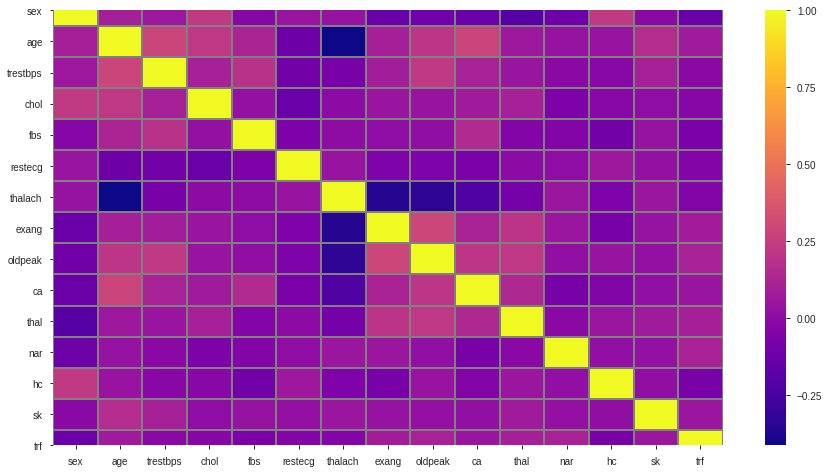

In [20]:
#Verificando a correlação com um mapa de calor
plt.subplots(figsize=(15, 8))  
sns.heatmap(data_final.corr(), cmap='plasma', linecolor='gray', linewidths=1)


Class 0: 196
Class 1: 92
Proportion: 2.13 : 1


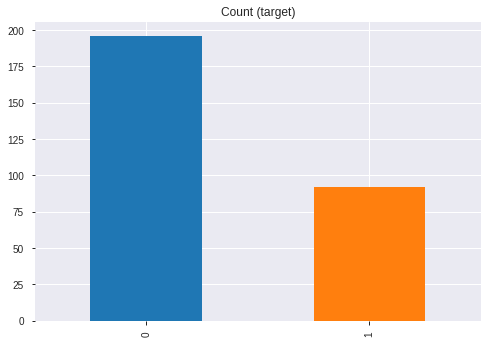

In [21]:
#observando se há desbalanceamento entre  F e M
target_count = data_final.sex.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E']);

In [22]:
#Como foi observado um desbalancemaneto que causava uma baixa acurácia na predição de 1,
#realizamos uma correção.

#Arrumando o desbalanceamento
from imblearn.under_sampling import RandomUnderSampler
# Number of data points in the minority class
number_records_f = len(data_final[data_final.sex == 0])
f_indices = np.array(data_final[data_final.sex == 0].index)

# Picking the indices of the m classes
m_indices = data_final[data_final.sex == 1].index

# Out of the indices we picked, randomly select "x" number (number_records_f)
random_m_indices = np.random.choice(m_indices, number_records_f)
random_m_indices = np.array(random_m_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([f_indices,random_m_indices])


# Under sample dataset
under_sample_data = data_final.loc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'sex']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'sex']

# Showing ratio
print("Percentage of m transactions: ", len(under_sample_data[under_sample_data.sex == 1])/len(under_sample_data))
print("Percentage of f: ", len(under_sample_data[under_sample_data.sex == 0])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))


Percentage of m transactions:  0.5
Percentage of f:  0.5
Total number of transactions in resampled data:  392


In [23]:
#Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.25)


In [24]:
#Agora vamos fazer as predições utilizando os modelos Random Forest, XGBoost, SVM e KNN
clf = RandomForestClassifier(criterion = 'entropy',n_estimators  = 10,max_depth =50,
 min_samples_leaf= 1,min_samples_split= 5 )
modelo = clf.fit(X_train,y_train)
#scores = clf.score(X_train,y_train)
previsoes = modelo.predict(X_test)    
print(metrics.classification_report(y_test,previsoes))
resultado = modelo.predict_proba(X_test)[:,1]
resultado

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        46
           1       0.83      0.83      0.83        52

    accuracy                           0.82        98
   macro avg       0.82      0.82      0.82        98
weighted avg       0.82      0.82      0.82        98



array([0.3375    , 0.95142857, 1.        , 0.7077381 , 0.13333333,
       0.37083333, 0.13666667, 0.08285714, 0.24285714, 0.52916667,
       0.85      , 0.93333333, 0.63      , 0.80833333, 0.65      ,
       0.12595238, 0.875     , 0.59      , 0.88666667, 0.81666667,
       1.        , 0.78      , 0.55833333, 0.875     , 0.9       ,
       0.05416667, 0.15      , 0.85833333, 0.25      , 0.33809524,
       0.33333333, 0.64666667, 0.275     , 0.2       , 1.        ,
       0.75      , 0.        , 0.21666667, 0.24285714, 0.54666667,
       0.        , 0.81666667, 0.19833333, 0.41166667, 0.25      ,
       0.185     , 0.43333333, 0.44166667, 0.92      , 0.15      ,
       0.50833333, 0.81666667, 0.81      , 0.92166667, 0.88333333,
       0.69642857, 0.33333333, 1.        , 0.85      , 0.5       ,
       0.11666667, 1.        , 0.2       , 0.78833333, 0.72916667,
       0.25333333, 0.95142857, 1.        , 0.41666667, 0.97142857,
       0.13333333, 0.04      , 0.02      , 0.81666667, 0.66833

In [25]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score


modelo = xgb.XGBClassifier(max_depth=10,learning_rate=0.01,n_estimators=1000)
modelo.fit(X_train,y_train)    
resultado2 = modelo.predict_proba(X_test)[:,1]
score = roc_auc_score(y_test, resultado2)
score


0.890886287625418

In [26]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
resultado_svc = clf.predict(X_test)
score = roc_auc_score(y_test, resultado_svc)
score
print(metrics.classification_report(y_test,resultado_svc))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        46
           1       1.00      0.81      0.89        52

    accuracy                           0.90        98
   macro avg       0.91      0.90      0.90        98
weighted avg       0.92      0.90      0.90        98



In [27]:
#Modelo KNN apresentou resultado baixo
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
resultado_knn = neigh.predict(X_test)
score = roc_auc_score(y_test, resultado_knn)
score

0.7190635451505016

In [28]:
#O SVC apresentou uma acurácia mais alta e foi o escolhido para a predição.
#Realizou-se o GridGridSearchCV para análise dos parâmetros, assim como um cross validation
#Realizou-se também uma seleção de features, sendo que esta não apresentou ganho significativo nos resultados
#O modelo final apresentou acurácia de em média 93%

In [29]:
#Abaixo encontra-se o Tunning do modelo

In [31]:
#Importa o utilitário GridSearchCV

from sklearn.model_selection import GridSearchCV
#Lista de Valores de C

lista_C = [0.1,1, 10, 100,1000]

#Lista de Valores de gamma

lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

#Lista de valores Kernel

lista_kernel = ['rbf']

#Define um dicionário que recebe as listas de parâmetros e valores.

parametros_grid = dict(C=lista_C, gamma=lista_gamma, kernel = lista_kernel)

#parametros_grid
#Objeto Grid recebe parâmetros e configurações de cross validation

grid = GridSearchCV(clf, parametros_grid, cv=10, scoring='accuracy')
#Aplica o gridsearch passando os dados de treino e classes.

grid.fit(X_undersample, y_undersample)
#Imprime os scores por combinações
grid.param_grid
#Imprime os melhores parâmetros

grid.best_params_





{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}